In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We start off by loading and then merging the datasets we want to use:

In [2]:
dat1 = pd.read_csv('key.csv', sep=',')
dat2 = pd.read_csv('SP500_finratios.csv', sep=',', parse_dates=['adate', 'qdate', 'public_date'])
dat3 = pd.read_csv('ratings2.csv', sep=',', parse_dates=['datadate'])

In [3]:
#the columns of the first data set are renamed to match the names of the other data sets
dat1.columns = ['gvkey','linktype','permno','permco','linkdt','linkenddt','conm','tic','cusip']

In [4]:
#the duplicates in the key data set are removed, so that pd.merge() will work
dat1 = dat1.set_index('permno')
dat1 = dat1[~dat1.index.duplicated(keep='first')]

In [5]:
#the variable datadate is renamed public_date and both are transformed to the same format, so
# that pd.merge()recognises them as one and the same
dat3['public_date'] = dat3['datadate']
del dat3['datadate']
dat2['public_date'] = pd.to_datetime(dat2.public_date)
dat3['public_date'] = pd.to_datetime(dat3.public_date)

In [6]:
dat1and2 = pd.merge(dat1, dat2, on='permno', how='inner', validate='one_to_many')

In [7]:
dat = pd.merge(dat1and2, dat3, on=['gvkey', 'public_date', 'conm', 'tic', 'cusip'], how='inner', validate='one_to_one')

In [8]:
dat

,permno,gvkey,linktype,permco,linkdt,linkenddt,conm,tic,cusip,adate,...,debt_capital,de_ratio,cash_ratio,quick_ratio,curr_ratio,at_turn,ptb,PEG_trailing,DIVYIELD,splticrm
0,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2008-12-31,...,1.338,-9.366,0.428,0.603,0.664,0.816,NaN,NaN,NaN,B-
1,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN,NaN,B-
2,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN,NaN,B-
3,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.376,-8.291,0.629,0.787,0.859,0.787,NaN,NaN,NaN,B-
4,21020,1045,LC,20010,19500101,19620130,AMERICAN AIRLINES GROUP INC,AAL,02376R102,2009-12-31,...,1.366,-8.617,0.551,0.712,0.780,0.799,NaN,NaN,NaN,B-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29853,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.286,0.741,1.478,1.961,1.961,0.726,9.038,9.364,NaN,NaN
29854,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.278,0.775,1.467,2.010,2.010,0.678,8.184,10.913,NaN,NaN
29855,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.278,0.775,1.467,2.010,2.010,0.678,9.392,12.469,NaN,NaN
29856,13168,199356,LC,53964,20111221,E,TRIPADVISOR INC,TRIP,896945201,2014-12-31,...,0.278,0.775,1.467,2.010,2.010,0.678,8.557,11.359,NaN,NaN


In [9]:
#just a little indulgence
class color:
   purple = '\033[95m'
   cyan = '\033[36m'
   blue = '\033[94m'
   green = '\033[92m'
   yellow = '\033[93m'
   red = '\033[91m'
   bold = '\033[1m'
   underline = '\033[4m'
   end = '\033[0m'

Now that we have the data, let's have a look at it. First of, we're interested in the distribution of the ratings:

In [10]:
dat['splticrm'].value_counts()

BBB     4946
BBB+    4133
A-      3615
A       3196
BBB-    2654
A+      1670
BB+     1262
AA-      902
BB-      824
BB       757
AA       417
B+       305
AAA      296
AA+      199
B-       133
B        109
CCC+      50
D          4
CCC        2
Name: splticrm, dtype: int64

Seeing as there are only four observations of rating D, and only two observations of rating CCC, our data set does not allow us to draw any conclusions for these ratings and we have to drop them from our sample.

In [11]:
dat = dat[dat['splticrm'] != 'CCC']
dat = dat[dat['splticrm'] != 'D']

Following that, we consider our numerical data:

In [12]:
des = dat.loc[:, 'bm':'cash_lt'].describe()
ind = [3, 1, 5, 7]   #printing the entire .describe() information consumes needlessly much computation power, so I index the lines I'm interested in
print(des.iloc[ind], '\n')
des = dat.loc[:, 'invt_act':].describe()  #I do this in two steps, because I don't want any variables hidden behind "..."
ind = [3, 1, 5, 7]
print(des.iloc[ind])

              bm          ps         pcf        dpr        npm        gpm  \
min     0.001000    0.047000 -224.460000  -0.001000 -51.493000 -37.707000   
mean    0.511099    2.530784   12.210846   0.489392   0.080365   0.431986   
50%     0.391000    1.814000   11.113000   0.305000   0.092000   0.406000   
max   137.237000  145.774000  280.893000  80.554000   1.799000   0.982000   

            cfm       roa        roe      roce     efftax     GProf  \
min  -47.694000 -0.595000 -34.647000 -1.111000 -12.365000 -1.143000   
mean   0.152864  0.142624   0.166138  0.176364   0.290338  0.294441   
50%    0.152500  0.139000   0.137000  0.154000   0.302000  0.263500   
max    2.054000  0.626000  15.502000  2.279000  29.944000  1.255000   

      equity_invcap  debt_invcap  totdebt_invcap  capital_ratio     int_debt  \
min      -17.816000     0.000000        0.000000      -5.619000     0.000000   
mean       0.593529     0.389615        0.471293       0.395291     0.336795   
50%        0.63300

The output suggests that several variables have extreme outliers - for instance bm has a minimum of 0.001000, a mean of  0.506463, but a maximum of 137.237000. Visualising the data with boxplots and pairplots shows this quite notably. We looked at all values, but not wanting to make the document unnecessarily long, we just include a boxplot of bm and a small pairplot here.

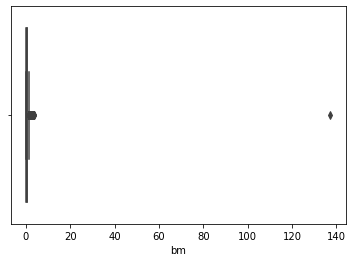

In [13]:
sns.boxplot(x = 'bm', data = dat)

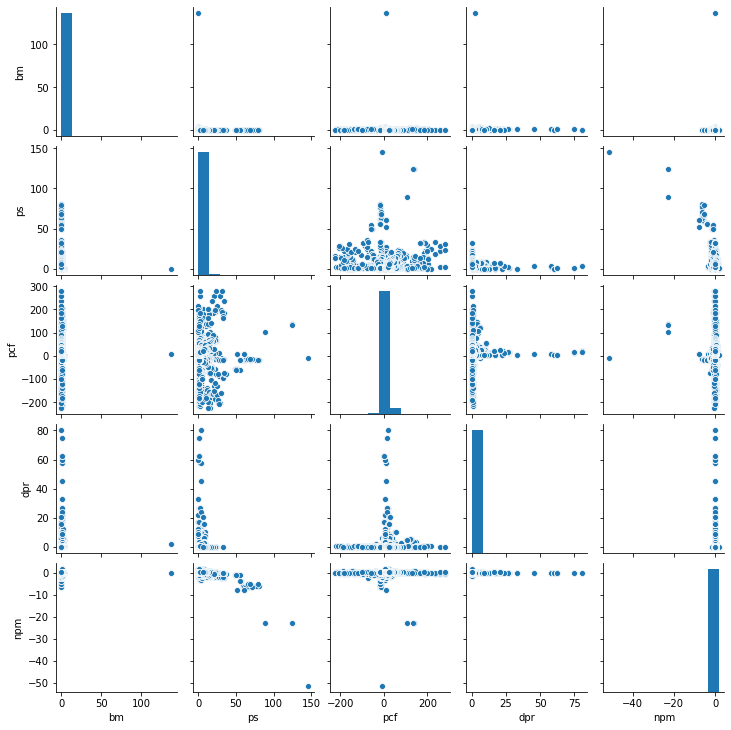

In [14]:
#this takes a looong time to compute, be patient
sns.pairplot(dat.loc[:, 'bm':'npm'], height = 2)

After looking at the data we have, we take a look at the data we do not have:

In [15]:
col_Names = dat.columns.values
total_NAs = pd.isnull(dat).sum()
percentage_NAs = dat.isnull().sum()/len(dat)
print(color.bold + "%-20s %-14s %s" %("Column Names", "Total NAs", "NAs per observations") + color.end )
#I used the % operator because tab didn't work and this allows me to define the spaces between the items

#the loop prints one line after another
for item_a, item_b, item_c in zip(col_Names, total_NAs, percentage_NAs):
    print("%-20s %-14d %.6f" %(item_a, item_b, item_c))

Column Names         Total NAs      NAs per observations
permno               0              0.000000
gvkey                0              0.000000
linktype             0              0.000000
permco               0              0.000000
linkdt               0              0.000000
linkenddt            0              0.000000
conm                 0              0.000000
tic                  0              0.000000
cusip                0              0.000000
adate                13             0.000435
qdate                0              0.000000
public_date          0              0.000000
bm                   638            0.021372
ps                   12             0.000402
pcf                  27             0.000904
dpr                  1862           0.062374
npm                  12             0.000402
gpm                  12             0.000402
cfm                  98             0.003283
roa                  27             0.000904
roe                  666            0.02231

As shown above, one third of the observations of PEG_trailing is missing. The large amount of missing values does not mean we have to dispense with the variable, though. As shown in https://www.sciencedirect.com/science/article/pii/S0895435618308710 we can still use multiple imputation, which is beneficial in regards to the bias and never detrimental to the statistical efficiency.

However, multiple imputation is based on the assumption of **missing at random**, where "conditional on the observed data, the probability of missingness is independent of unobserved data". (Same source.) This is of course impossible to test, since we will never know what the unobserved data is. We believe, however, that the reason for missing data is very likely related to either the companies or to the point in time at which the data was retrieved, meaning that either way, our dataset contains the information necessary and the assumption is fulfilled. (For further explanations on the differences between missing at random, missing not at random, and missing completely at random, see our paper.)